콘볼루션 커널 예제입니다.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
print( "Imported." )

Imported.


uint8 (360, 640)


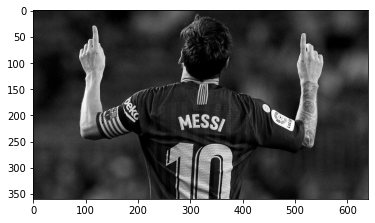

In [4]:
img = plt.imread('messi5.jpg')
img = np.sum( img*[.2126, .7152, .0722], axis=2 ).astype('uint8')
print( img.dtype, img.shape )
plt.imshow( img, cmap='gray')
plt.show()

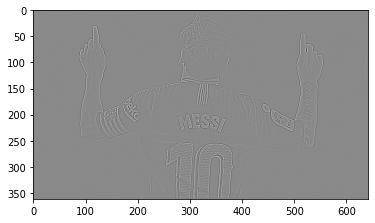

In [5]:
from scipy import signal
a = signal.convolve( img, [ [-1,-1,-1], [-1,8,-1], [-1,-1,-1] ] )

plt.imshow( a, cmap='gray')
plt.show()

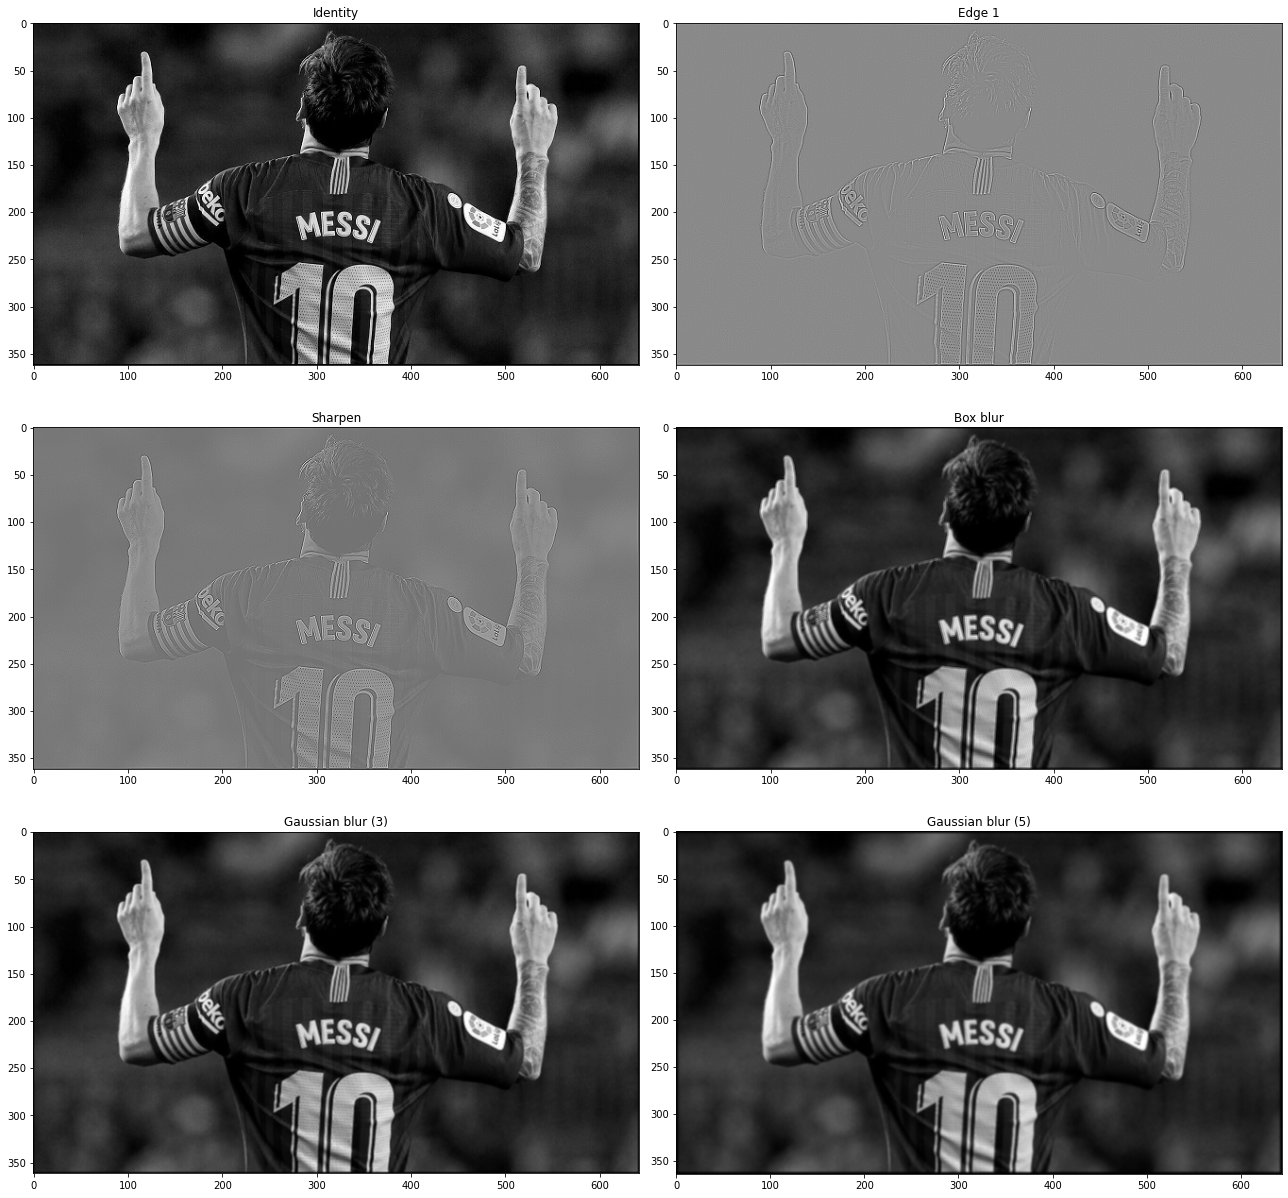

In [8]:
from scipy import signal
import os

if not os.path.exists( './temp' ) : os.makedirs( './temp' )

kernels = [ ]
kernels.append( [ "Identity" , '0 0 0; 0 1 0; 0 0 0' ] )
kernels.append( [ "Edge 1" ,   '-1 -1 -1; -1 8 -1; -1 -1 -1' ] )
kernels.append( [ "Sharpen" ,  '0 -1 0; -1 5 -1; 0 -1 0' ] )
kernels.append( [ "Box blur" ,  '1 1 1; 1 1 1; 1 1 1', 1/9 ] )
kernels.append( [ "Gaussian blur (3)" ,  '1 2 1; 2 4 2; 1 2 1', 1/16 ] )
kernels.append( [ "Gaussian blur (5)" ,  '1 4 6 4 1; 4 16 24 15 4; 6 24 36 24 6; 4 16 24 16 4; 1 4 6 4 1', 1/256 ] )

fig, axis = plt.subplots(3, 2,figsize=(18, 17))

for i, kernel_info in enumerate( kernels ): 
    title = kernel_info[0]
    kernel = np.matrix( kernel_info[1] )
    if len(kernel_info) > 2 : kernel = kernel*kernel_info[2] 
    a = signal.convolve( img, kernel )
    ax = axis[ i//2, i%2 ]
    ax.imshow( a, cmap='gray' )
    ax.set_title( title )
    plt.imsave( f'./temp/{i + 1:02}_{title}.jpg', a, cmap='gray' )
pass

fig.tight_layout()
plt.show()

In [10]:
import os

print( "Current Directory", os.getcwd() )

if not os.path.exists( './temp' ) : os.makedirs( './temp' )

Current Directory c:\vision
